# Import libraries

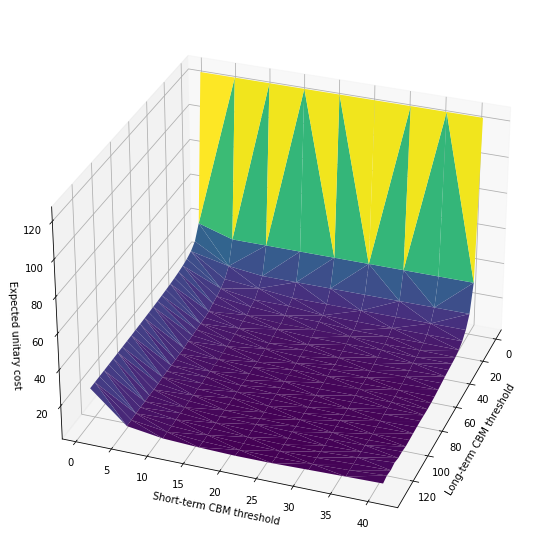

In [1]:
import time
from Asset_degradation import *

# Global variables

In [2]:
short_term = Failure_mode_degradation(initial_condition = 10, failure_threshold = 100, average_degradation_parameter = 2, variability_degradation_parameter = 4,
                                      degradation = [], inspection = 15, time_maintenance_threshold = 100, condition_maintenance_threshold = 100, inspection_costs = 10, preventive_maintenance_costs= 100, corrective_maintenance_costs = 200) #short-term failure mode definition
long_term = Failure_mode_degradation(initial_condition = 0, failure_threshold = 200, average_degradation_parameter = 0.1, variability_degradation_parameter = 2,
                                      degradation = [], inspection = 15, time_maintenance_threshold = 200, condition_maintenance_threshold = 200, inspection_costs = 10, preventive_maintenance_costs= 200, corrective_maintenance_costs = 1000) #long-term failure mode definition
shock_threshold = 50 #threshold of activation for the shocks
lameda_shocks = 0.5 #shocks per time step
shock_intensity_mean = 7 #normal distribution
shock_intensity_stdev = 2 #normal distribution
simulating_periods = 1000

# What is missing?

In [7]:
#Falta introduzir o erro de inspeção na manutenção continua manutenção com inspeção
#Falta introduzir os cenários

# Test developed functions

## Simulate degradation (example)

In [3]:
start_time = time.time()
short_term, long_term = simulate_degradation(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods)
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

--- Simulation computational time = 0.026810884475708008 seconds ---


## Get maintenance interventions (example)

In [4]:
st_teste = maintenance_interventions(short_term.degradation, short_term.initial_condition, short_term.failure_threshold)
lt_teste = maintenance_interventions(long_term.degradation, long_term.initial_condition, long_term.failure_threshold)

## Plot of the simulated degradation (example)

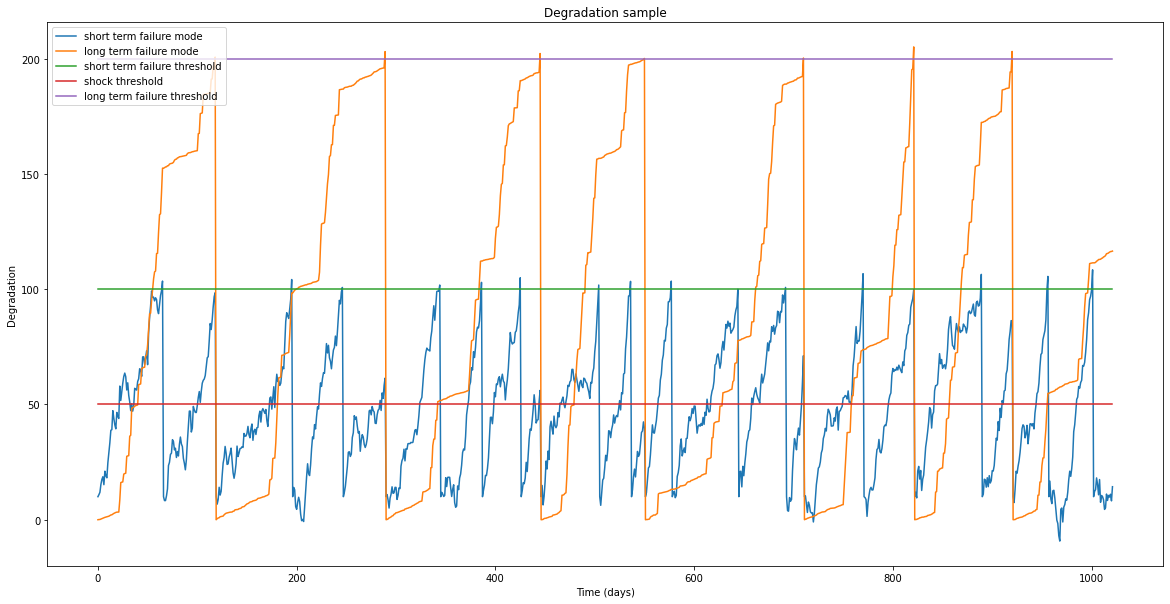

In [5]:
degradation_plot(short_term.degradation, short_term.failure_threshold, shock_threshold, long_term.degradation, long_term.failure_threshold)

# Test maintenance policies optimization - example for the Corrective Maintenance (CM)

In [10]:
#Start clock
start_time = time.time()

#Compute maintenance policy
maintenance_policy = 'CM'
policy_step = 0.1
time_limit = 200
simulating_periods = 10000
results = simulate_maintenance_policy(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, time_limit, policy_step)

#Convert the results to a specific format
st_expected_maintenance_cost_per_unit_of_time,lt_expected_maintenance_cost_per_unit_of_time = list(results['st_expected_maintenance_cost_per_unit_of_time']),list(results['lt_expected_maintenance_cost_per_unit_of_time'])

#Compute maintenance costs
cost = round(min(st_expected_maintenance_cost_per_unit_of_time) + min(lt_expected_maintenance_cost_per_unit_of_time), 2)
print(f'Expected maintenance cost per unit of time using a corrective maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

Expected maintenance cost per unit of time using a corrective maintenance policy = 11.32
--- Simulation computational time = 1.8072021007537842 seconds ---


# Test best maintenance policies optimization - example for the best cost (replace immediately before failure)#

In [11]:
#Start clock
start_time = time.time()

#Compute maintenance policy
maintenance_policy = 'PM'
policy_step = 0.1
time_limit = 200
simulating_periods = 10000
results = simulate_maintenance_policy(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, time_limit, policy_step)

#Convert the results to a specific format
st_expected_maintenance_cost_per_unit_of_time,lt_expected_maintenance_cost_per_unit_of_time = list(results['st_expected_maintenance_cost_per_unit_of_time']),list(results['lt_expected_maintenance_cost_per_unit_of_time'])

#Compute maintenance costs
cost = round(min(st_expected_maintenance_cost_per_unit_of_time) + min(lt_expected_maintenance_cost_per_unit_of_time), 2)
print(f'Expected maintenance cost per unit of time using a perfect maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

Expected maintenance cost per unit of time using a perfect maintenance policy = 3.82
--- Simulation computational time = 1.7833499908447266 seconds ---


# Test maintenance policies optimization - example for the Time Based Maintenance (TBM)
# assuming failure independence

In [18]:
#Start clock
start_time = time.time()

#Compute maintenance policy
maintenance_policy = 'ITBM'
policy_step = 0.1
time_limit = 200
simulating_periods = 10000
results = simulate_maintenance_policy(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, time_limit, policy_step)

#Convert the results to a specific format
time_policy = list(results['policy'])
st_expected_maintenance_cost_per_unit_of_time,lt_expected_maintenance_cost_per_unit_of_time = list(results['st_expected_maintenance_cost_per_unit_of_time']),list(results['lt_expected_maintenance_cost_per_unit_of_time'])

#Compute optimal decisions
lt_optimal_t = time_policy[lt_expected_maintenance_cost_per_unit_of_time.index(min(lt_expected_maintenance_cost_per_unit_of_time))]
st_optimal_t = time_policy[st_expected_maintenance_cost_per_unit_of_time.index(min(st_expected_maintenance_cost_per_unit_of_time))]
print(f'The long-term optimal replacement period is {lt_optimal_t} || The short-term optimal replacement period is {st_optimal_t}')

#Compute maintenance costs
cost = round(min(st_expected_maintenance_cost_per_unit_of_time) + min(lt_expected_maintenance_cost_per_unit_of_time), 2)
print(f'Expected maintenance cost per unit of time using a time based maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

The long-term optimal replacement period is 89.10000000000001 || The short-term optimal replacement period is 32.1
Expected maintenance cost per unit of time using a time based maintenance policy = 6.53
--- Simulation computational time = 3.600163698196411 seconds ---


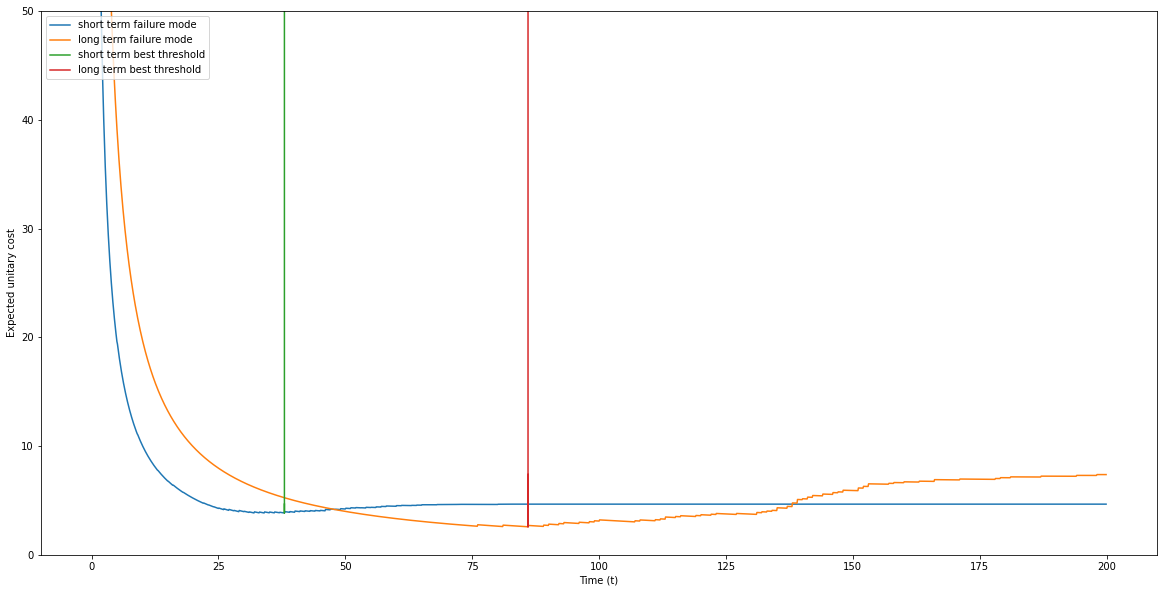

In [13]:
policy_costs_plot(st_expected_maintenance_cost_per_unit_of_time, lt_expected_maintenance_cost_per_unit_of_time, time_limit, policy_step, "Time (t)", 50)

# Test maintenance policies optimization - example for the Time Based Maintenance (TBM)

In [14]:
#Start clock
start_time = time.time()

#Compute maintenance policy
maintenance_policy = 'TBM'
policy_step = 5
condition_limit = 200
simulating_periods = 10000
results = simulate_maintenance_policy(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, condition_limit, policy_step)

#Convert the results to a specific format
results['total_expected_unitary_cost'] = results['st_expected_maintenance_cost_per_unit_of_time'] + results['lt_expected_maintenance_cost_per_unit_of_time']
condition_policy, total_expected_maintenance_cost_per_unit_of_time = list(results['policy']), list(results['total_expected_unitary_cost'])

#Compute optimal decisions
optimal_cbm = condition_policy[total_expected_maintenance_cost_per_unit_of_time.index(min(total_expected_maintenance_cost_per_unit_of_time))]
print(f'The long-term optimal time threshold is {optimal_cbm.split("/")[0]} || The short-term optimal time threshold is {optimal_cbm.split("/")[1]}')

#Compute maintenance costs
cost = round(min(total_expected_maintenance_cost_per_unit_of_time), 2)
print(f'Expected maintenance cost per unit of time using a continuous time based maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

The long-term optimal time threshold is 111 || The short-term optimal time threshold is 31
Expected maintenance cost per unit of time using a continuous time based maintenance policy = 5.52
--- Simulation computational time = 35.917556047439575 seconds ---


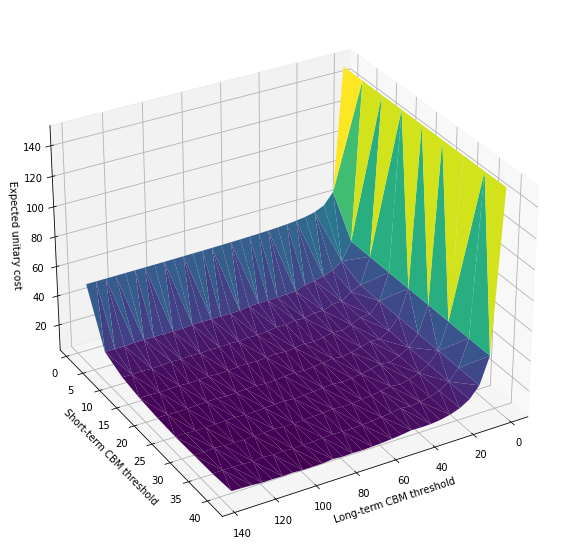

In [16]:
#alterar texto das legendas. tenho de atualizar a função
plot_cbm_maintenance_costs(results, 60)

# Test maintenance policies optimization - example for the Continuous Based Maintenance with perfect continuous inspection (CBM)

In [33]:
#Start clock
start_time = time.time()

#Compute maintenance policy
maintenance_policy = 'CBM'
policy_step = 5
condition_limit = 200
simulating_periods = 10000
results = simulate_maintenance_policy(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, condition_limit, policy_step)

#Convert the results to a specific format
results['total_expected_unitary_cost'] = results['st_expected_maintenance_cost_per_unit_of_time'] + results['lt_expected_maintenance_cost_per_unit_of_time']
condition_policy, total_expected_maintenance_cost_per_unit_of_time = list(results['policy']), list(results['total_expected_unitary_cost'])

#Compute optimal decisions
optimal_cbm = condition_policy[total_expected_maintenance_cost_per_unit_of_time.index(min(total_expected_maintenance_cost_per_unit_of_time))]
print(f'The long-term optimal condition threshold is {optimal_cbm.split("/")[0]} || The short-term optimal condition threshold is {optimal_cbm.split("/")[1]}')

#Compute maintenance costs
cost = round(min(total_expected_maintenance_cost_per_unit_of_time), 2)
print(f'Expected maintenance cost per unit of time using a continuous condition based maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

The long-term optimal condition threshold is 186 || The short-term optimal condition threshold is 86
Expected maintenance cost per unit of time using a continuous condition based maintenance policy = 4.04
--- Simulation computational time = 125.6581039428711 seconds ---


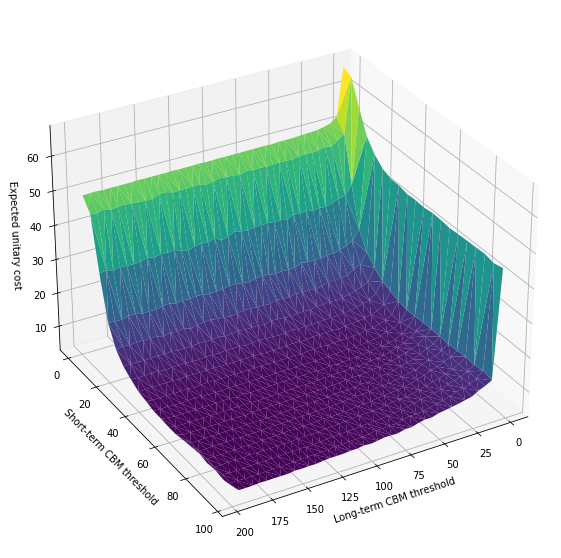

In [34]:
plot_cbm_maintenance_costs(results, 60)

# Test maintenance policies optimization - example for the optimized Continuous Based Maintenance with perfect inspection (ICBM)

In [19]:
#Test for different time inspections
optimal_cost, inspection_time_list = list(), list()
for inspection_time in range(10,101,5):

    #Start clock
    start_time = time.time()

    #Compute maintenance policy
    short_term.inspection, long_term.inspection = inspection_time,inspection_time
    maintenance_policy = 'ICBM'
    policy_step = 5
    condition_limit = 200
    simulating_periods = 10000
    results = simulate_maintenance_policy(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, condition_limit, policy_step)

    #Convert the results to a specific format
    results['total_expected_unitary_cost'] = results['st_expected_maintenance_cost_per_unit_of_time'] + results['lt_expected_maintenance_cost_per_unit_of_time']
    condition_policy, total_expected_maintenance_cost_per_unit_of_time = list(results['policy']), list(results['total_expected_unitary_cost'])

    #Compute optimal decisions
    optimal_cbm = condition_policy[total_expected_maintenance_cost_per_unit_of_time.index(min(total_expected_maintenance_cost_per_unit_of_time))]
    print(f'The long-term optimal condition threshold is {optimal_cbm.split("/")[0]} || The short-term optimal condition threshold is {optimal_cbm.split("/")[1]} with an inspection period of {short_term.inspection}')

    #Compute maintenance costs
    cost = round(min(total_expected_maintenance_cost_per_unit_of_time), 2)
    print(f'Expected maintenance cost per unit of time using a inspection condition based maintenance policy = {cost}')

    #Save the obtained result given the inspection
    optimal_cost.append(cost), inspection_time_list.append(inspection_time)

    #print computational time
    print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

The long-term optimal condition threshold is 161 || The short-term optimal condition threshold is 66 with an inspection period of 10
Expected maintenance cost per unit of time using a inspection condition based maintenance policy = 6.2
--- Simulation computational time = 169.97484278678894 seconds ---
The long-term optimal condition threshold is 141 || The short-term optimal condition threshold is 56 with an inspection period of 15
Expected maintenance cost per unit of time using a inspection condition based maintenance policy = 5.65
--- Simulation computational time = 137.26549291610718 seconds ---
The long-term optimal condition threshold is 151 || The short-term optimal condition threshold is 51 with an inspection period of 20
Expected maintenance cost per unit of time using a inspection condition based maintenance policy = 5.43
--- Simulation computational time = 101.19293904304504 seconds ---
The long-term optimal condition threshold is 136 || The short-term optimal condition thre

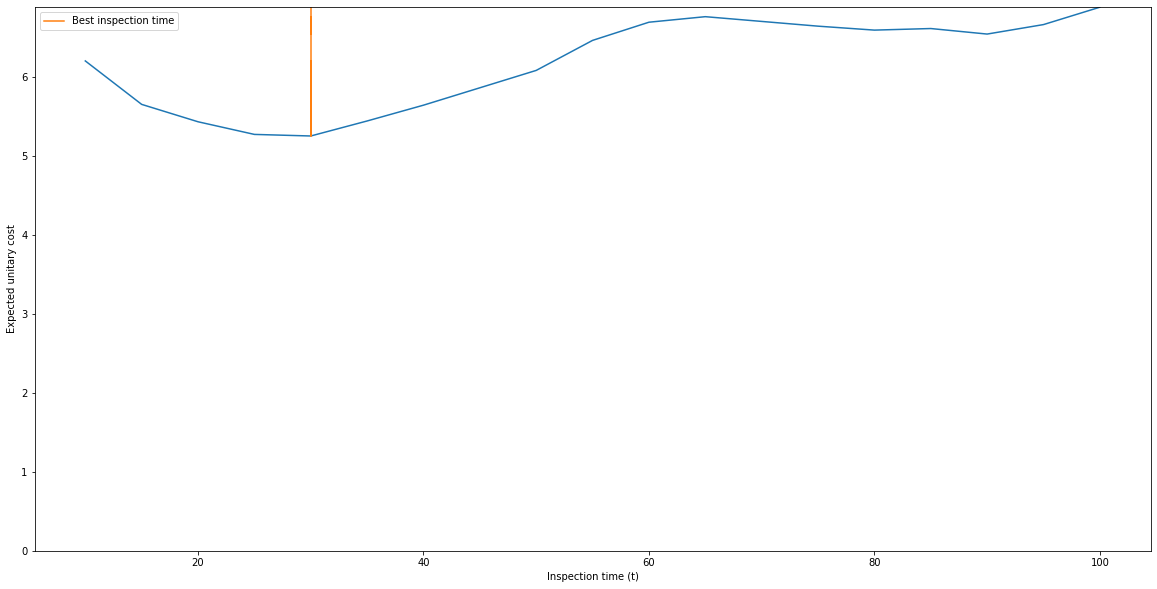

In [27]:
#build inspection policy
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(np.array(inspection_time_list), np.array(optimal_cost))

#Plot labeling
ax.set(xlabel="Inspection time (t)", ylabel='Expected unitary cost')

#add thresholds
ax.plot([inspection_time_list[optimal_cost.index(min(optimal_cost))]] * len(inspection_time_list), np.array(optimal_cost), label="Best inspection time")

#Plot ylim
plt.ylim(0,max(optimal_cost))

#Show results
plt.legend(loc='upper left')
plt.show()

# Test maintenance policies optimization - example for the Continuous Based Maintenance with perfect inspection (ICBM)

In [28]:
#Start clock
start_time = time.time()

#Compute maintenance policy
short_term.inspection, long_term.inspection = inspection_time_list[optimal_cost.index(min(optimal_cost))], inspection_time_list[optimal_cost.index(min(optimal_cost))]
maintenance_policy = 'ICBM'
policy_step = 5
condition_limit = 200
simulating_periods = 10000
results = simulate_maintenance_policy(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, condition_limit, policy_step)

#Convert the results to a specific format
results['total_expected_unitary_cost'] = results['st_expected_maintenance_cost_per_unit_of_time'] + results['lt_expected_maintenance_cost_per_unit_of_time']
condition_policy, total_expected_maintenance_cost_per_unit_of_time = list(results['policy']), list(results['total_expected_unitary_cost'])

#Compute optimal decisions
optimal_cbm = condition_policy[total_expected_maintenance_cost_per_unit_of_time.index(min(total_expected_maintenance_cost_per_unit_of_time))]
print(f'The long-term optimal condition threshold is {optimal_cbm.split("/")[0]} || The short-term optimal condition threshold is {optimal_cbm.split("/")[1]} with an inspection period of {short_term.inspection}')

#Compute maintenance costs
cost = round(min(total_expected_maintenance_cost_per_unit_of_time), 2)
print(f'Expected maintenance cost per unit of time using a inspection condition based maintenance policy = {cost}')

#print computational time
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

The long-term optimal condition threshold is 131 || The short-term optimal condition threshold is 41 with an inspection period of 30
Expected maintenance cost per unit of time using a inspection condition based maintenance policy = 5.29
--- Simulation computational time = 138.68606805801392 seconds ---


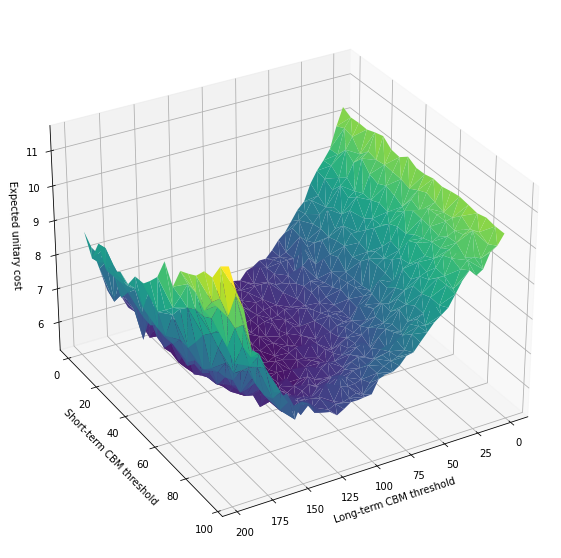

In [31]:
plot_cbm_maintenance_costs(results, 60)